# Linear Regression

In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [21]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [22]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                        2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

### TF Graph

In [23]:
X = tf.placeholder( "float" )
Y = tf.placeholder( "float" )

In [24]:
W = tf.Variable( rng.randn(), name = "weights" )
b = tf.Variable( rng.randn(), name = "bias" )

In [25]:
pred = tf.add( tf.multiply(X,W), b )

In [26]:
cost = tf.reduce_sum( tf.pow(pred-Y,2) ) / (2*n_samples)

In [27]:
optimizer = tf.train.GradientDescentOptimizer( learning_rate ).minimize( cost )

In [28]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.077513129 W= 0.26259226 b= 0.70795506
Epoch: 0100 cost= 0.077451766 W= 0.26181918 b= 0.7135169
Epoch: 0150 cost= 0.077397548 W= 0.26109195 b= 0.718748
Epoch: 0200 cost= 0.077349626 W= 0.26040807 b= 0.72366786
Epoch: 0250 cost= 0.077307299 W= 0.25976485 b= 0.7282953
Epoch: 0300 cost= 0.077269927 W= 0.2591597 b= 0.732648
Epoch: 0350 cost= 0.077236898 W= 0.25859085 b= 0.7367411
Epoch: 0400 cost= 0.077207737 W= 0.25805557 b= 0.74059194
Epoch: 0450 cost= 0.077181987 W= 0.25755215 b= 0.74421346
Epoch: 0500 cost= 0.077159233 W= 0.25707865 b= 0.74761957
Epoch: 0550 cost= 0.077139154 W= 0.2566333 b= 0.7508231
Epoch: 0600 cost= 0.077121444 W= 0.25621456 b= 0.7538359
Epoch: 0650 cost= 0.077105805 W= 0.2558206 b= 0.75666964
Epoch: 0700 cost= 0.077091999 W= 0.25545004 b= 0.7593354
Epoch: 0750 cost= 0.077079840 W= 0.25510168 b= 0.7618415
Epoch: 0800 cost= 0.077069089 W= 0.25477397 b= 0.76419926
Epoch: 0850 cost= 0.077059627 W= 0.2544657 b= 0.766417
Epoch: 0900 cost= 0.077051252 W

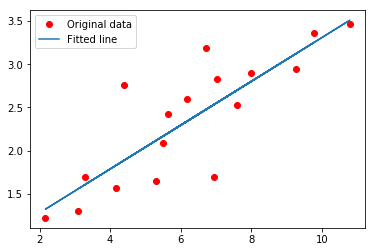

Testing... (Mean square loss Comparison)
Testing cost= 0.07835908
Absolute mean square loss difference: 0.0013217106


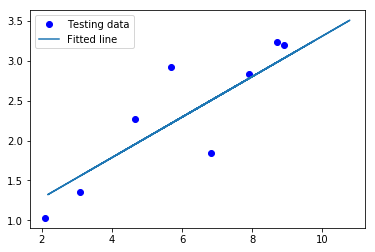

In [29]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()